In [2]:
import pandas as pd
from sklearn.datasets import load_iris


In [59]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score

In [4]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
df["target"]=iris.target

In [16]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [20]:
df['flowername']=df.target.apply(lambda x:iris.target_names[x])

In [23]:
df.flowername.value_counts()

setosa        50
versicolor    50
virginica     50
Name: flowername, dtype: int64

In [25]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [24]:
import matplotlib.pyplot as plt

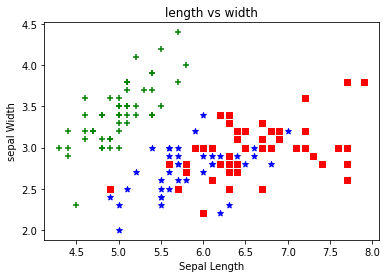

In [37]:
plt.title("length vs width")
plt.xlabel("Sepal Length")
plt.ylabel("sepal Width")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker="*")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="red",marker="s")


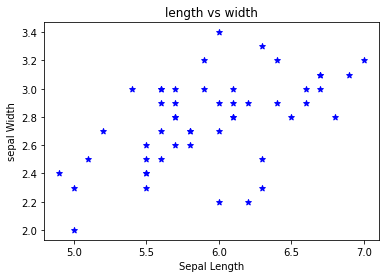

In [33]:
plt.title("length vs width")
plt.xlabel("Sepal Length")
plt.ylabel("sepal Width")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker="*")

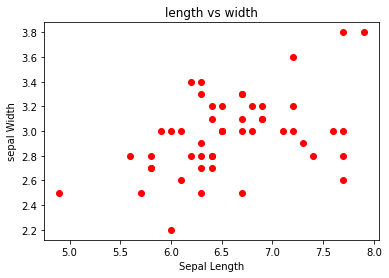

In [34]:
plt.title("length vs width")
plt.xlabel("Sepal Length")
plt.ylabel("sepal Width")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="red")

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= df.drop(['target','flowername'],axis=1)

In [42]:
Y=df.target

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [64]:
print(X_train.shape)
X_test.shape

(120, 4)


(30, 4)

In [65]:
from sklearn.neighbors import KNeighborsClassifier


In [66]:
KNN=KNeighborsClassifier(n_neighbors=10)

In [67]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
KNN.predict([[4.8,3.0,1.0,5.3]])

/home/aniket/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [72]:
y_pred=KNN.predict(X_test)

In [75]:
KNN.score(X_test,Y_test)

0.9666666666666667

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9666666666666667

<AxesSubplot:>

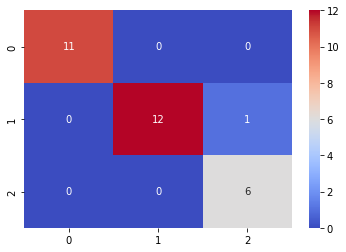

In [85]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true=Y_test, y_pred=y_pred), annot=True, cmap='coolwarm')

In [80]:
from sklearn.metrics import classification_report

In [87]:
s=classification_report(Y_test,y_pred)

In [88]:
print(s)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

